# Linear Regression Implementation without using any library/framework -->

#### $$\hat y = mx_i+c$$


### $$E={1\over n} \Sigma (y_i - \hat y)^2$$


##### Here, E is the Mean Squared Error or MSE

![MSE and GD ](https://i.ibb.co/Drrs1gh/download-2.jpg)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Loading the dataset -> 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing
#Boston Housing Dataset got removed so used the alternative.

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
df=housing

dataset=pd.DataFrame(df.data)

In [20]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
dataset.columns=df.feature_names
dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [25]:
#Independent and Dependent variables -> 
X=dataset
y=df.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [83]:
#Training and Testing split of data -> 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4321)

X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20556,1.9510,17.0,3.838451,1.081442,1876.0,2.504673,38.67,-121.79
6935,4.3333,31.0,4.838428,1.039301,1151.0,5.026201,34.01,-118.09
13291,2.5870,33.0,5.549333,1.090667,1008.0,2.688000,34.07,-117.66
5551,3.2708,35.0,3.542391,1.051087,2003.0,2.177174,33.95,-118.38
20167,2.7019,22.0,5.510937,1.110937,1483.0,2.317188,34.44,-119.27
...,...,...,...,...,...,...,...,...
3218,1.7596,26.0,5.103448,1.043103,268.0,2.310345,36.32,-119.68
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84
10616,2.4233,5.0,4.361111,0.888889,880.0,3.055556,33.69,-117.81
11198,2.2716,26.0,2.890000,0.982500,1880.0,4.700000,33.84,-117.91


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[-1.01164649, -0.92137026, -0.62295227, ..., -0.0520985 ,
         1.41495946, -1.10100253],
       [ 0.23735534,  0.18561027, -0.23191458, ...,  0.17754588,
        -0.76397428,  0.74818582],
       [-0.67820185,  0.34375035,  0.0460827 , ..., -0.03540226,
        -0.73591934,  0.96309149],
       ...,
       [-0.76402714, -1.87021071, -0.41856781, ..., -0.00192769,
        -0.91360063,  0.8881244 ],
       [-0.84356103, -0.20973992, -0.99384111, ...,  0.14783763,
        -0.84346328,  0.83814633],
       [-0.3877485 , -0.60509011,  0.01965517, ..., -0.0475383 ,
         1.4430144 , -0.88609686]])

In [85]:
from sklearn.linear_model import LinearRegression   

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [86]:
from sklearn.model_selection import cross_val_score
#Mean squared error 
mse=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error" , cv=10)
print(mse)

[-0.59996626 -0.50185907 -0.61421947 -0.46262952 -0.55667868 -0.50472781
 -0.53452457 -0.5581403  -0.4991269  -0.52424621]


In [87]:
np.mean(mse)

-0.5356118779006884

In [88]:
reg_pred=regression.predict(X_test)
reg_pred

array([0.95981718, 2.34682967, 1.37151306, ..., 1.26222349, 1.5614736 ,
       1.09651183])

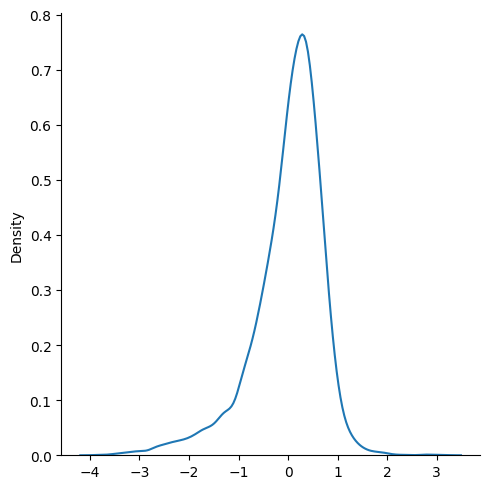

In [89]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind="kde")

In [90]:
#Graph up shows less range of deviation which is good
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
score

0.3465933083973919

# More mathematical implementation -> 


In [121]:
data = pd.read_csv('swedish_insurance.csv')
data.head()

X = data['X'].values
Y = data['Y'].values
X,Y

(array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
         23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
          4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
         16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
         13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
         65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
          4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
         98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
        217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
         73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
         55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5]))

In [122]:
X = np.c_[np.ones(len(X)), X]
X=X.T
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [108.,  19.,  13., 124.,  40.,  57.,  23.,  14.,  45.,  10.,   5.,
         48.,  11.,  23.,   7.,   2.,  24.,   6.,   3.,  23.,   6.,   9.,
          9.,   3.,  29.,   7.,   4.,  20.,   7.,   4.,   0.,  25.,   6.,
          5.,  22.,  11.,  61.,  12.,   4.,  16.,  13.,  60.,  41.,  37.,
         55.,  41.,  11.,  27.,   8.,   3.,  17.,  13.,  13.,  15.,   8.,
         29.,  30.,  24.,   9.,  31.,  14.,  53.,  26.]])

##### Code for mathematical intuitions developed


In [123]:
#Predictions/Hypothesis
def compute_hypothesis(params, X):
    predictions = np.matmul(params.T,X)
    return predictions  

In [124]:
#Cost function  -> Mean Squared Error function (/2)
def compute_cost(predictions, actual):
    m = len(actual)
    errors = predictions - actual
    squared_errors = errors*errors
    mse = np.sum(squared_errors)/(2*m)
    return mse

In [125]:
#Gradient Descent -> 

def gradient_descent(X, Y, learning_rate = 0.00003,iterations = 1000):
    actual = Y
    costs = []
    params = np.zeros(X.shape[0])
    m = len(actual)
    for i in range(iterations):
        predictions = compute_hypothesis(params, X)
        errors = predictions - actual
        costs.append(compute_cost(predictions, actual))
        gradients = (1/m)*np.matmul(X,errors)
        params = params - (learning_rate*gradients)
    return params, costs

In [127]:
params,costs=gradient_descent(X,Y)


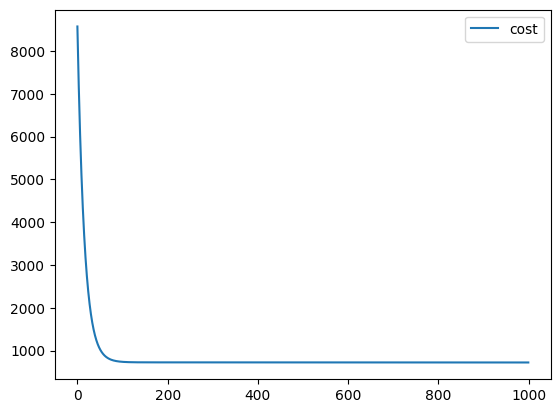

In [128]:
plt.plot(np.arange(1000), costs, label='cost' )
plt.legend(loc='upper right')

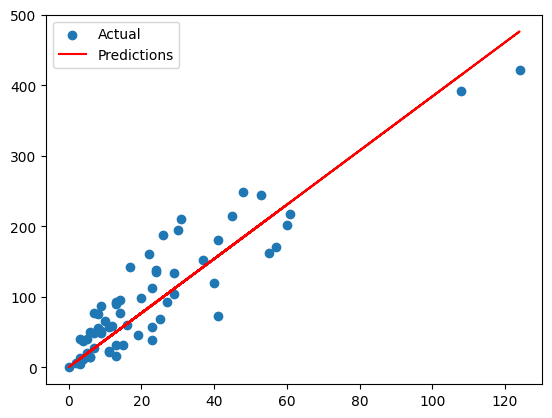

In [129]:
predictions = np.matmul(params.T, X)
plt.scatter(X[1,:], Y, label = 'Actual')
plt.plot(X[1,:], predictions, color='red', label='Predictions')
plt.legend(loc='upper left')

#### Similarly there are multiple loss functions and optimising techniques, Which can be defined by us easily like this but as it is tedious and slower, We use already defined functions,parameters and modules from PyTorch or TensorFlow